# Business Case: Aerofit - Descriptive Statistics & Probability

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of
treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers.
The team decides to investigate whether there are differences across the product with respect to customer
characteristics.


## Problem statement

1. Analyse the product sales of each product
2. How Fitness levels attained by each Products
3. Products sales among genters
4. How coustemers plan to use products
5. How Usage per week of each products varies
6. How Fitness levels achived by each products
7. Distribution of Quantitive data
8. Product purchased by Martialstatus
9. Explain correlations amoung our quantitative data
10. Compare mean and median of quantitative values and detecting outlayer values
11. Find the relationship between Miles running vs Aerofit priferance
12. Find the relationship between Miles running vs fitness
13. Find the relationship between usage vs fitness for each products
14. Usage vs miles with diffrent fitness levels
15. Find the Probability of Fitness for each usage per week
16. Relation between Usage per week and fitness on the basis of MaritalStatus
17. Find Relation between Income and Aerofit priferance
18. Probabilty of each product based on Income
19. marginal probability of purchase w.r.t salary
20. Education vs miles running
21. MaritalStatus vs Age preferance of each product
22. Probability of buying products w.r.t Age
23. Probability of each products for single users
24. Probability of each products for partnered users
25. Find the Expected price of 100 products selling

In [79]:
# Importing libraries -
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
# Loading the dataset -
df=pd.read_csv("aerofit_treadmill.csv")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [81]:
# Shape of the dataset -
df.shape

(180, 9)

In [82]:
#checking datatypes
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [83]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [84]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [85]:
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [86]:
# Number of unique values in each column
for col_name in df.columns:
    print(col_name,":",df[col_name].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


From the above observation, we can conclude that only Inncome, Miles and Age can be considered as Continuous, the rest of the columns though integers/floats should be considered as categories

In [88]:
# Checking for null values -
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

There aren't any missing values in the dataset.

In [89]:
df.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


**Observations**:
* There are no missing values in the data.
* There are 3 unique products in the dataset.
* KP281 is the most frequent product.
* Minimum & Maximum age of the person is 18 & 50, mean is 28.79 and 75% of persons have age less than or equal to 33.
* Most of the people are having 16 years of education i.e. 75% of persons are having education <= 16 years.
* Out of 180 data points, 104's gender is Male and rest are the female.
* Standard deviation for Income & Miles is very high. These variables might have the outliers in it.

In [90]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

There are 3 unique products available in the dataset.

## Univariate Analysis

**Understanding the distribution of the data for the quantitative attributes**:
1. Age
2. Education
3. Usage
4. Fitness
5. Income
6. Miles

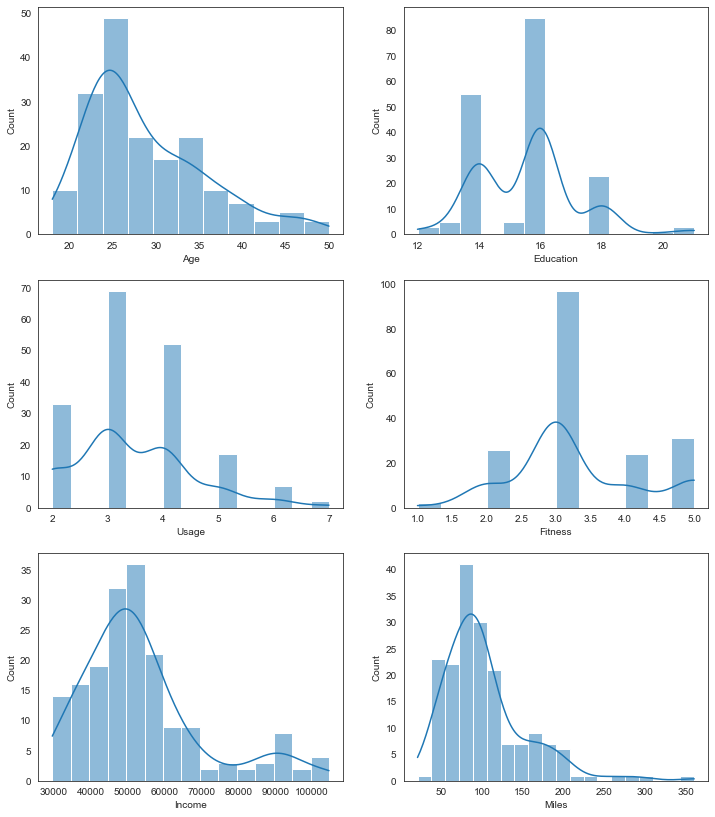

In [91]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=df, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=df, x="Usage", kde=True, ax=axis[1,0])
sns.histplot(data=df, x="Fitness", kde=True, ax=axis[1,1])
sns.histplot(data=df, x="Income", kde=True, ax=axis[2,0])
sns.histplot(data=df, x="Miles", kde=True, ax=axis[2,1])
plt.show()


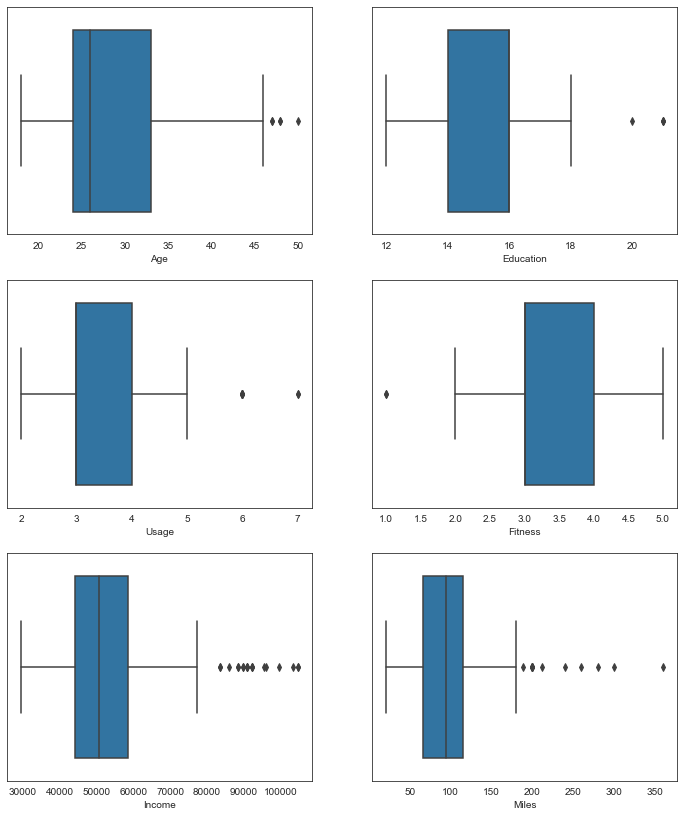

In [92]:
#Outliers detection using BoxPlots
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

* Age, Education and Usage are having very few outliers.
* While Income and Miles are having more outliers.

Certainly there are outliers in our data. When we remove them, this leads to loss of information and moreover we have a very small dataset of 180 rows. So instead of removing, it's going to be clipped (i.e. - ranges between 5 percentile and 95 percentile).

In [112]:
num_feat=['Age', 'Income', 'Miles']
for col in num_feat:
    percentiles = df[col].quantile([0.05,0.95]).values
    df_copy[col] = np.clip(df_copy[col], percentiles[0], percentiles[1])

#### Scatterplots for Analysis of Continuous Variables -

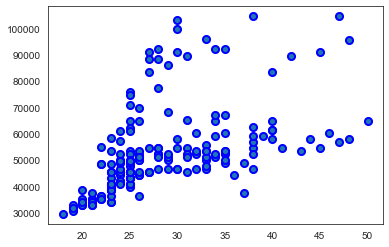

In [113]:
# Observing the association between Age and Income -

plt.scatter(df['Age'], df['Income'],
            linewidths = 2,
            marker ="o",
            edgecolor ="blue",
            s = 50)

The variance of income in lower ages is smaller as compared to the variance in higher ages, probably something called as Heteroscadasticity.

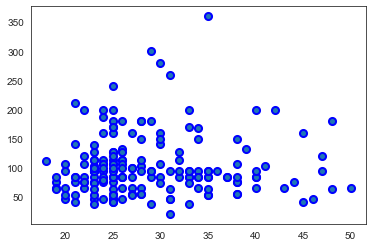

In [114]:
# Observing the association between Age and Miles -

plt.scatter(df['Age'], df['Miles'],
            linewidths = 2,
            marker ="o",
            edgecolor ="blue",
            s = 50)

No significant pattern or observation between Age and Miles run on a treadmill, also implied by heatmap with a correlation of 0.037.

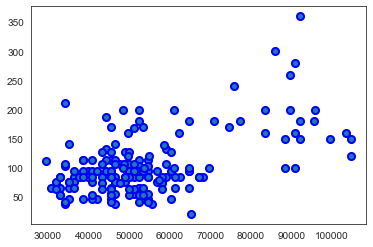

In [115]:
# Observing the association between Miles and Income -

plt.scatter(df['Income'], df['Miles'],
            linewidths = 2,
            marker ="o",
            edgecolor ="blue",
            s = 50)

The miles run on treadmill increase significantly with income, infact only people having incomes above 70000 have run over 220 miles. Moreover there's also a Heteroscadastic effect.

#### Analysis of Categorical Columns with the Product -

For this section, We'll be converting the Ages, Incomes and Miles to bins for better analysis.

C:\Users\NANO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


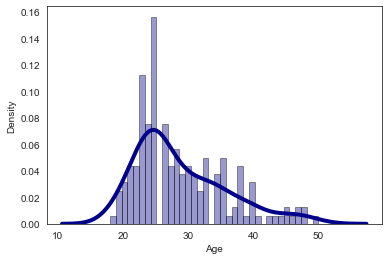

In [116]:
# Observing the ages to create bins -

sns.distplot(df['Age'], hist=True, kde=True, 
bins=int(36), color = 'darkblue', 
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

In [120]:
# Segmentising Age groups

df["Age_category"] = df["Age"]
df["Age_category"] = pd.cut(df["Age_category"], bins =[0,21,35,45,60], include_lowest=True, labels=["Teen(0-21)","Adult(22-35)","mid_age(36-45)","Towards_old-age(>46)"])
df["Age_category"] =df["Age_category"].astype("object")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Age_category
0,KP281,18,Male,14,Single,3,4,29562,112,<20,Teen(0-21)
1,KP281,19,Male,15,Single,2,3,31836,75,<20,Teen(0-21)
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,Teen(0-21)
3,KP281,19,Male,12,Single,3,3,32973,85,<20,Teen(0-21)
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,Teen(0-21)


C:\Users\NANO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


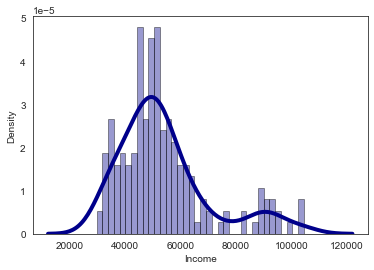

In [121]:
# Observing the incomes to create bins -

sns.distplot(df['Income'], hist=True, kde=True, 
bins=int(36), color = 'darkblue', 
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

In [122]:
df['Income'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

In [123]:
# Creating bins for income -

bins = [-1,35000,45000,50000,60000,70000,90000,120000]
labels = ['<35000','35000-45000','45000-50000','50000-60000','60000-70000','70000-90000','90000+']
df['Income_bins'] = pd.cut(df['Income'], bins=bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Age_category,Income_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20,Teen(0-21),<35000
1,KP281,19,Male,15,Single,2,3,31836,75,<20,Teen(0-21),<35000
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,Teen(0-21),<35000
3,KP281,19,Male,12,Single,3,3,32973,85,<20,Teen(0-21),<35000
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,Teen(0-21),35000-45000


C:\Users\NANO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


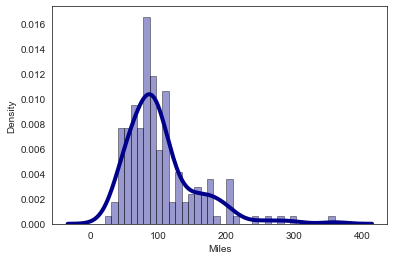

In [124]:
# Observing the miles to create bins -

sns.distplot(df['Miles'], hist=True, kde=True, 
bins=int(36), color = 'darkblue', 
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

In [125]:
df['Miles'].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

In [126]:
# Creating bins for miles -

bins = [-1,50,100,150,400]
labels = ['<50','50-100','100-150','150+']
df['Mile_bins'] = pd.cut(df['Miles'], bins=bins, labels=labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins,Age_category,Income_bins,Mile_bins
0,KP281,18,Male,14,Single,3,4,29562,112,<20,Teen(0-21),<35000,100-150
1,KP281,19,Male,15,Single,2,3,31836,75,<20,Teen(0-21),<35000,50-100
2,KP281,19,Female,14,Partnered,4,3,30699,66,<20,Teen(0-21),<35000,50-100
3,KP281,19,Male,12,Single,3,3,32973,85,<20,Teen(0-21),<35000,50-100
4,KP281,20,Male,13,Partnered,4,2,35247,47,<20,Teen(0-21),35000-45000,<50


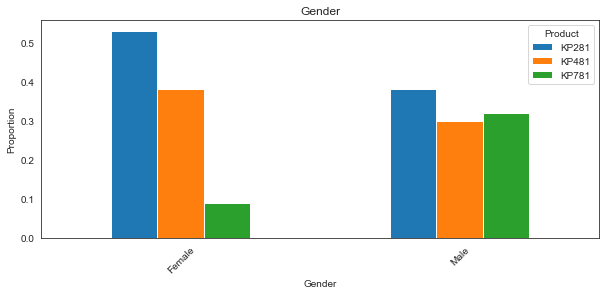

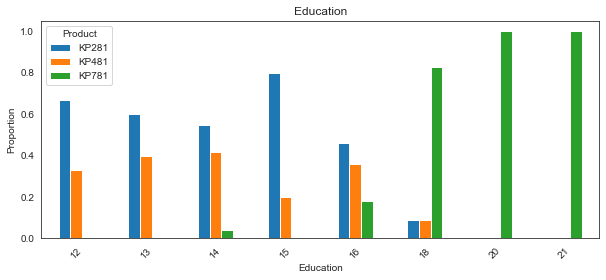

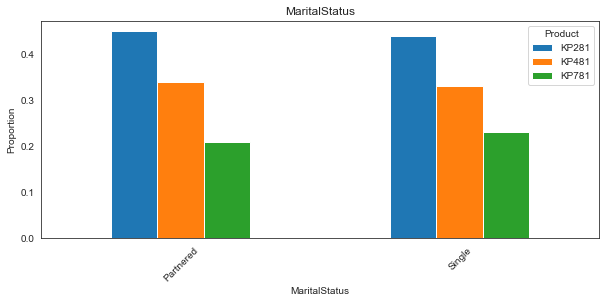

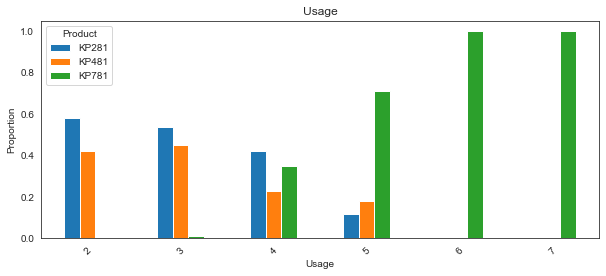

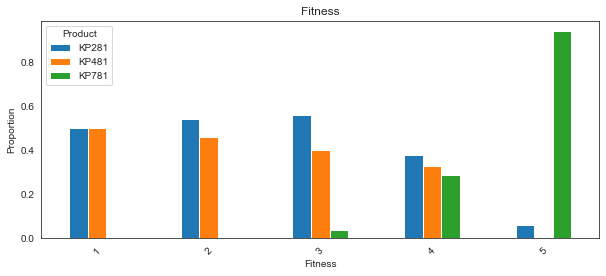

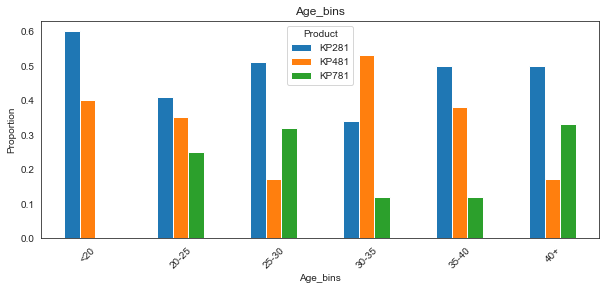

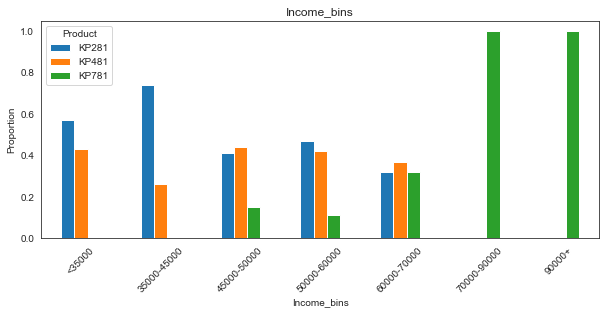

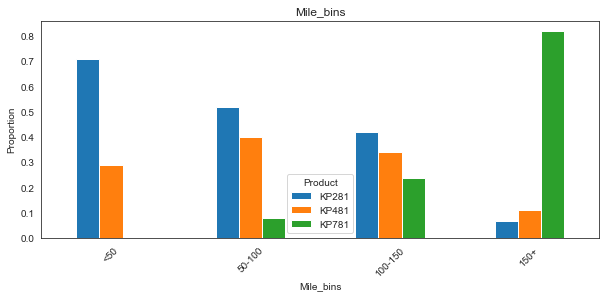

In [127]:
# Crosstabs -

cat_cols=['Gender','Education', 'MaritalStatus', 'Usage','Fitness','Age_bins','Income_bins','Mile_bins']
for i in cat_cols:
    other= round(pd.crosstab(df[df[i].notnull()][i], df['Product']).\
                 div(pd.crosstab(df[df[i].notnull()][i],df['Product']).apply(sum,1),0),2)
    ax = other.plot(kind ='bar', title = i, figsize = (10,4))
    ax.set_xlabel(i)
    ax.set_ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.show()

**Observations on the basis of above Categorical Plots**

- Around 55% of women prefer KP281 and only 10% prefer KP781. While around 35% of men prefer KP781.

- 80% in Eduation level of 18 and everyone in Education levels of 20 or 21 use KP781 while below 14 level, no one uses KP781.

- Marital Status implies no significant information on the usages of different treadmills.

- Those who workout 6 or 7 days a week use KP781 while 60% of those who workout 5 days a week use KP781.

- 95% of customers having fitness level of 5 use KP781 and none of those having fitness level below 3 use KP781.

- No one below 20 years of age use KP781.

- Above 70000 units of Income, people only use KP781 while in Incomes below 45000, no one uses KP781.

- Almost 80% of people who run over 200 miles and those who run above 150 miles use KP781 and no one who runs below 50 miles use KP781. The usage of KP281 decreases with the increase in miles while that of KP781 increases with the increase in miles.

In [128]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True,normalize=True)*100
#each element divided by 180

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.222222,16.111111,3.888889,42.222222
Male,22.222222,17.222222,18.333333,57.777778
All,44.444444,33.333333,22.222222,100.000000


In [129]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True,normalize='index')
#each element divided by summation of individual rows

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222


In [130]:
from IPython.display import display
for i in cat_cols:
    print('Table for',str(i),'vs Treadmill Product')
    display(pd.crosstab(df[i], df['Product'], margins=True, normalize='index'))
    print("\n")

Table for Gender vs Treadmill Product


Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222




Table for Education vs Treadmill Product


Product,KP281,KP481,KP781
Education,,,
12,0.666667,0.333333,0.000000
13,0.600000,0.400000,0.000000
14,0.545455,0.418182,0.036364
15,0.800000,0.200000,0.000000
16,0.458824,0.364706,0.176471
18,0.086957,0.086957,0.826087
20,0.000000,0.000000,1.000000
21,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222




Table for MaritalStatus vs Treadmill Product


Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877
All,0.444444,0.333333,0.222222




Table for Usage vs Treadmill Product


Product,KP281,KP481,KP781
Usage,,,
2,0.575758,0.424242,0.000000
3,0.536232,0.449275,0.014493
4,0.423077,0.230769,0.346154
5,0.117647,0.176471,0.705882
6,0.000000,0.000000,1.000000
7,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222




Table for Fitness vs Treadmill Product


Product,KP281,KP481,KP781
Fitness,,,
1,0.500000,0.500000,0.000000
2,0.538462,0.461538,0.000000
3,0.556701,0.402062,0.041237
4,0.375000,0.333333,0.291667
5,0.064516,0.000000,0.935484
All,0.444444,0.333333,0.222222




Table for Age_bins vs Treadmill Product


Product,KP281,KP481,KP781
Age_bins,,,
<20,0.600000,0.400000,0.000000
20-25,0.405797,0.347826,0.246377
25-30,0.512195,0.170732,0.317073
30-35,0.343750,0.531250,0.125000
35-40,0.500000,0.375000,0.125000
40+,0.500000,0.166667,0.333333
All,0.444444,0.333333,0.222222




Table for Income_bins vs Treadmill Product


Product,KP281,KP481,KP781
Income_bins,,,
<35000,0.571429,0.428571,0.000000
35000-45000,0.742857,0.257143,0.000000
45000-50000,0.411765,0.441176,0.147059
50000-60000,0.472727,0.418182,0.109091
60000-70000,0.315789,0.368421,0.315789
70000-90000,0.000000,0.000000,1.000000
90000+,0.000000,0.000000,1.000000
All,0.444444,0.333333,0.222222




Table for Mile_bins vs Treadmill Product


Product,KP281,KP481,KP781
Mile_bins,,,
<50,0.705882,0.294118,0.000000
50-100,0.515464,0.402062,0.082474
100-150,0.421053,0.342105,0.236842
150+,0.071429,0.107143,0.821429
All,0.444444,0.333333,0.222222


### Multivariate Analysis using Scatterplots and Factorplots for different Products (predominately to understand target audience for KP281 and KP481 which appear quite similar).

C:\Users\NANO\AppData\Local\Temp\ipykernel_11016\3689240407.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
C:\Users\NANO\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


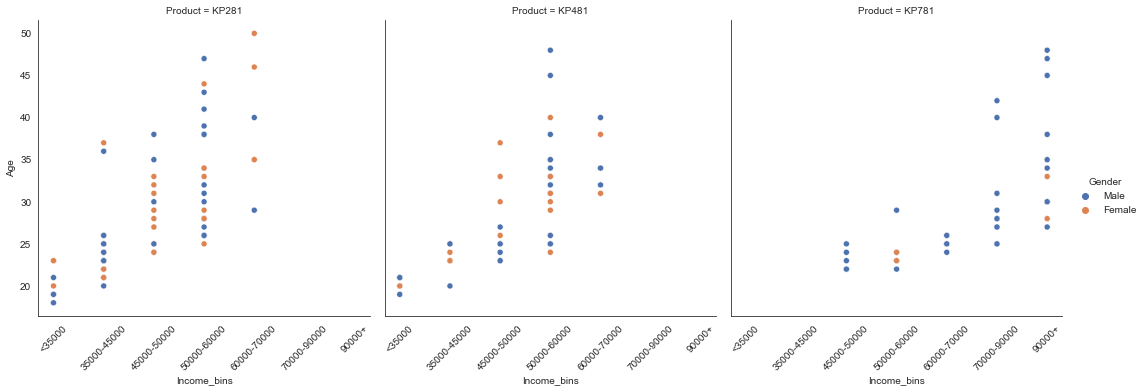

<Figure size 720x432 with 0 Axes>

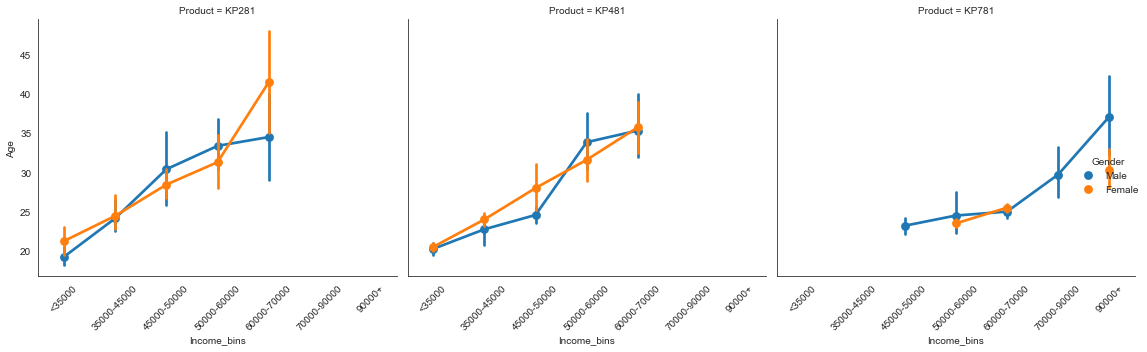

In [131]:
plot=sns.relplot(data=df, x='Income_bins', y='Age', col='Product', hue='Gender', palette="deep", kind="scatter")
plt.figure(figsize=(10,6))
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plot=sns.factorplot(x ='Income_bins', y ='Age',
               hue='Gender',col = 'Product', data = df)
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

- For women having incomes below 70k, the average age of those who use KP281 is 40 while it's 35 for those who use KP481.

- Only 2 women have incomes over 70k which is certainly the reason for a large proportion of them not buying KP781 (affordability).

Moreover the variances are higher in case of KP281. Though there are less data points for this observation, so it requires more data to be verified.

C:\Users\NANO\AppData\Local\Temp\ipykernel_11016\1682816559.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
C:\Users\NANO\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


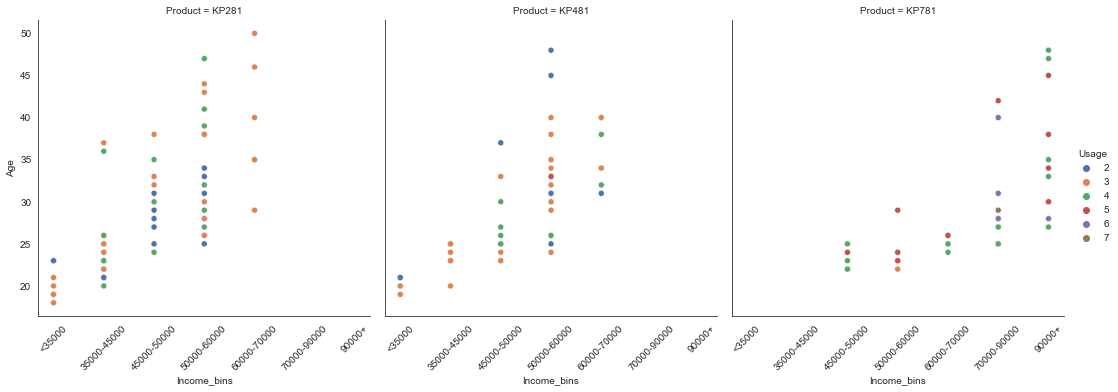

<Figure size 720x432 with 0 Axes>

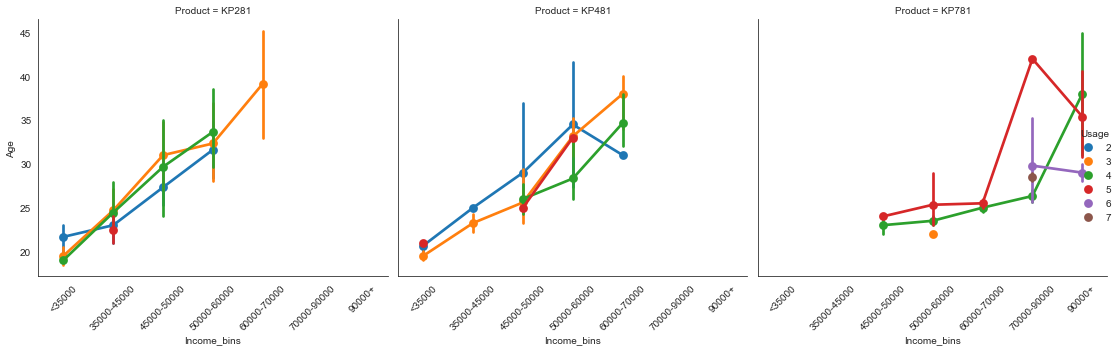

In [132]:
plot=sns.relplot(data=df, x='Income_bins', y='Age', col='Product', hue='Usage', palette="deep", kind="scatter")
plt.figure(figsize=(10,6))
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plot=sns.factorplot(x ='Income_bins', y ='Age',
               hue='Usage',col = 'Product', data = df)
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

1) For Usage=3 and Income in the range 60k-70k, we are very much certain of the user to be buying the KP281 Treadmill.

2) For Usage=2 and Income in the range 45k-50k, we are very much certain of the user to be buying the KP281 Treadmill.

3) For income range 45k-50k and Usage=4, we are very much certain of the user to be buying KP281 Treadmill.

4) For income range 50k-60k and Usage=4, we are very much certain of the user to be buying KP281 Treadmill.

C:\Users\NANO\AppData\Local\Temp\ipykernel_11016\3109169749.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
C:\Users\NANO\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


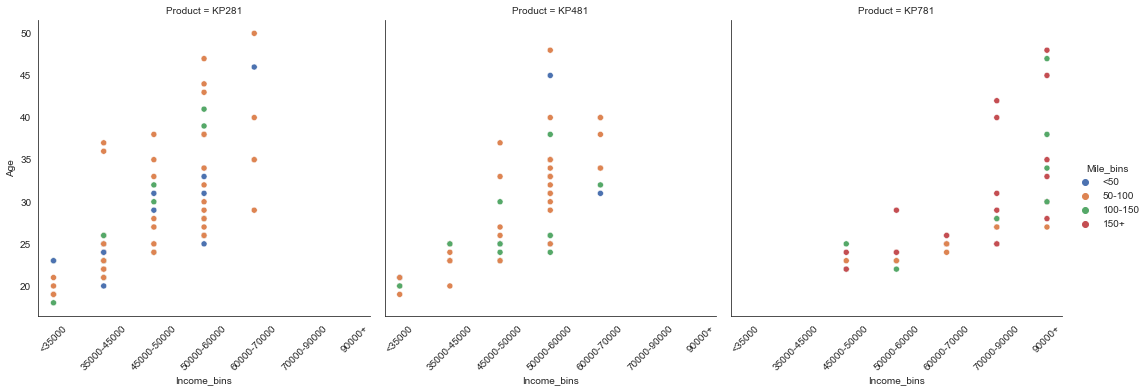

<Figure size 720x432 with 0 Axes>

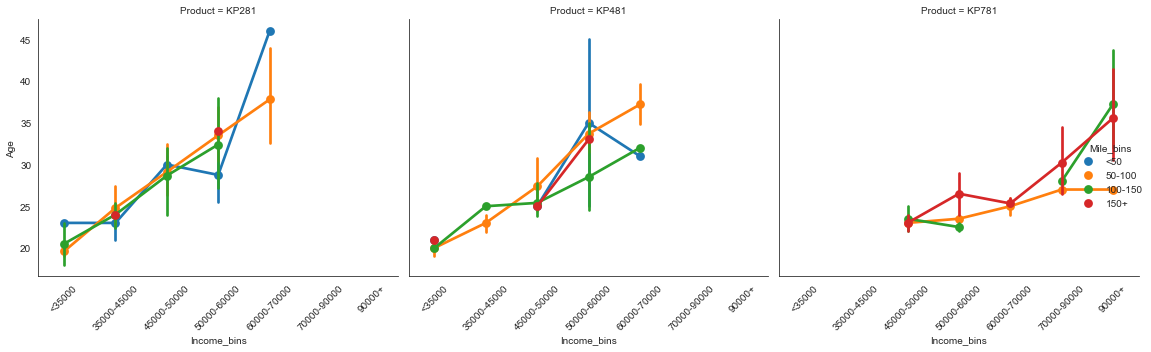

In [133]:
plot=sns.relplot(data=df, x='Income_bins', y='Age', col='Product', hue='Mile_bins', palette="deep", kind="scatter")
plt.figure(figsize=(10,6))
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plot=sns.factorplot(x ='Income_bins', y ='Age',
               hue='Mile_bins',col = 'Product', data = df)
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

For no. of miles in range 100-150, those customers whose incomes are in range of 50k-60k and age between 25 to 30 tend to use KP481.

C:\Users\NANO\AppData\Local\Temp\ipykernel_11016\1557738764.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
C:\Users\NANO\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


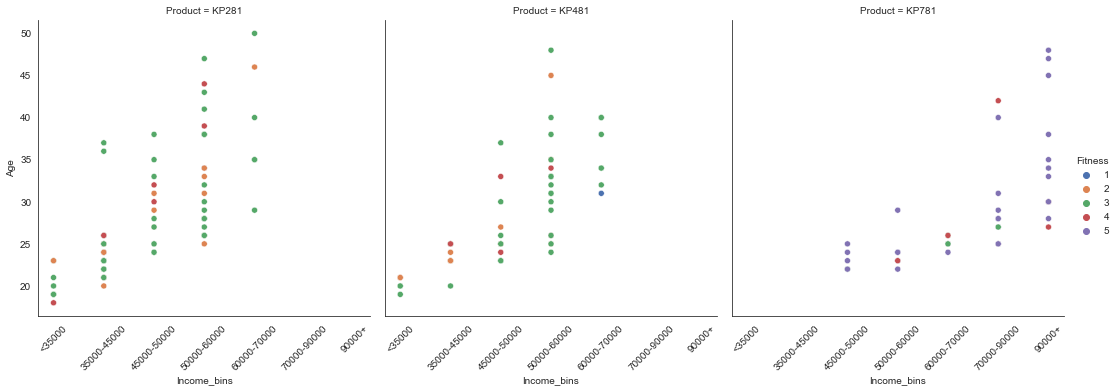

<Figure size 720x432 with 0 Axes>

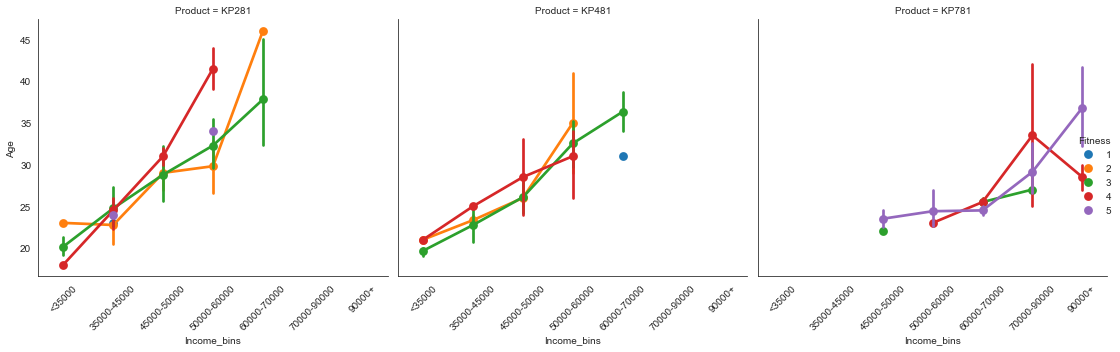

In [135]:
plot=sns.relplot(data=df, x='Income_bins', y='Age', col='Product', hue='Fitness', palette="deep", kind="scatter")
plt.figure(figsize=(10,6))
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plot=sns.factorplot(x ='Income_bins', y ='Age',
               hue='Fitness',col = 'Product', data = df)
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

- Customers with around 40 years of age, having fitness level of 4 and incomes in the range 50k-60k tend to use KP281.

- Customers with around 25-32 years of age and having fitness level of 4 with incomes in the range 50k-60k tend to use KP481.

C:\Users\NANO\AppData\Local\Temp\ipykernel_11016\845729542.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
C:\Users\NANO\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


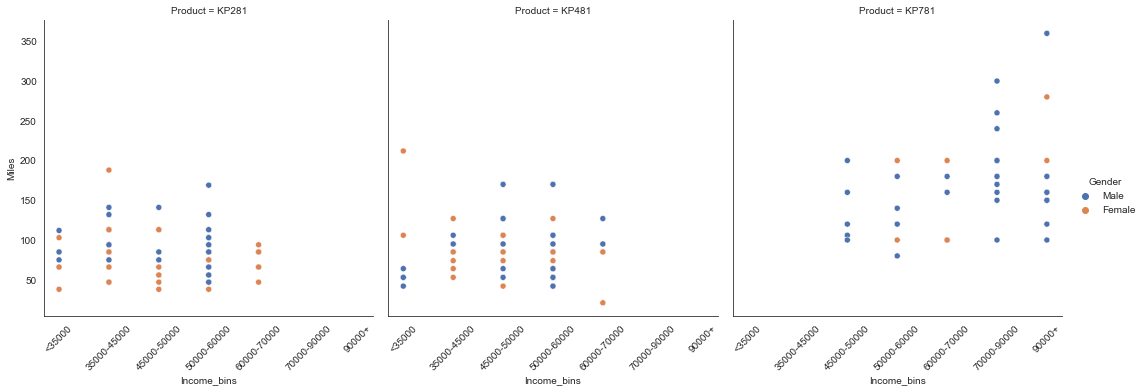

<Figure size 720x432 with 0 Axes>

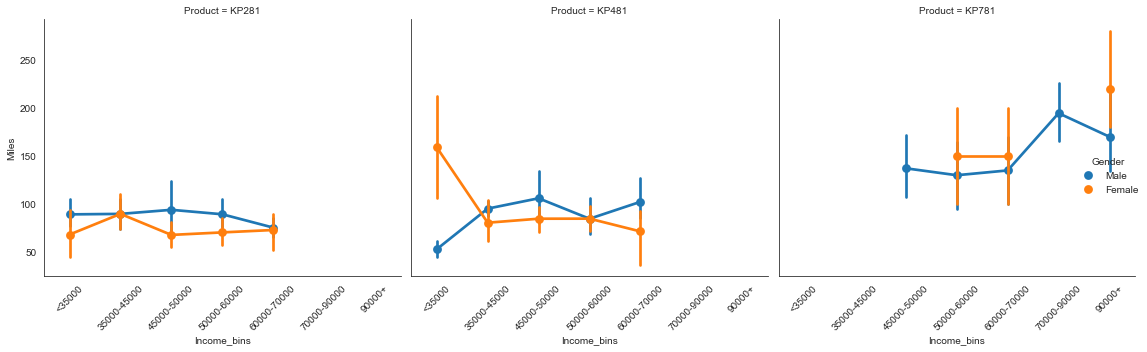

In [137]:
plot=sns.relplot(data=df, x='Income_bins', y='Miles', col='Product', hue='Gender', palette="deep", kind="scatter")
plt.figure(figsize=(10,6))
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plot=sns.factorplot(x ='Income_bins', y ='Miles',
               hue='Gender',col = 'Product', data = df)
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

1) For income level below 35k, women who tread over 105 miles tend to use KP481 while those who tread below 105 tend to use KP281.

2) Men with income level in 60k-70k, those who run in the range of 100-150 miles tend to use KP481.

C:\Users\NANO\AppData\Local\Temp\ipykernel_11016\1874351855.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
C:\Users\NANO\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


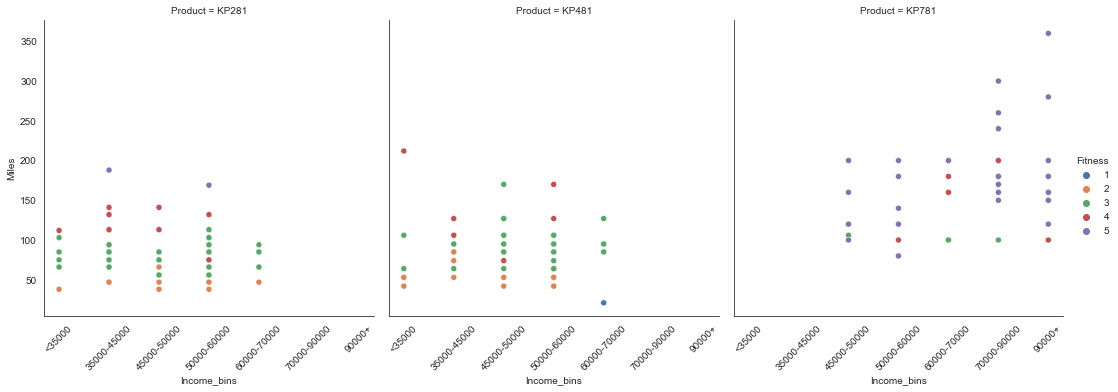

<Figure size 720x432 with 0 Axes>

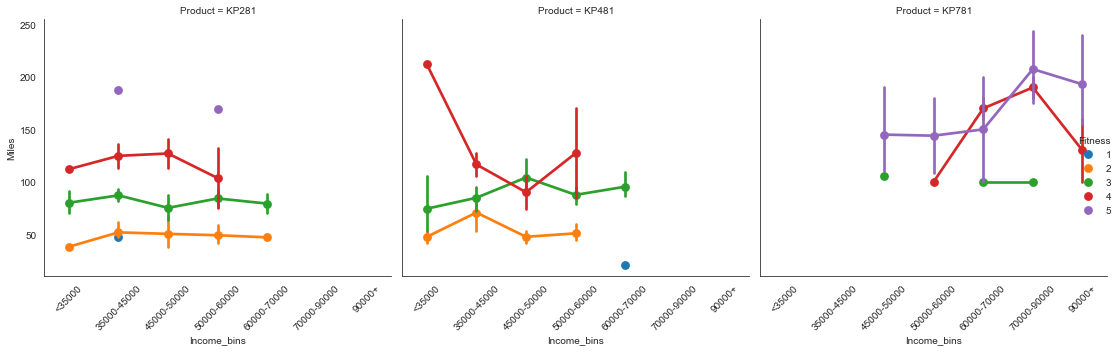

In [138]:
plot=sns.relplot(data=df, x='Income_bins', y='Miles', col='Product', hue='Fitness', palette="deep", kind="scatter")
plt.figure(figsize=(10,6))
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plot=sns.factorplot(x ='Income_bins', y ='Miles',
               hue='Fitness',col = 'Product', data = df)
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

1) If Fitness level=4 and incomes between 50k-60k, then these customers will tend to use KP281

2) If Fitness level=4 in Income level of 50k-60k, if the person runs more than 100 miles, they tend to use KP481.

C:\Users\NANO\AppData\Local\Temp\ipykernel_11016\154933440.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
C:\Users\NANO\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


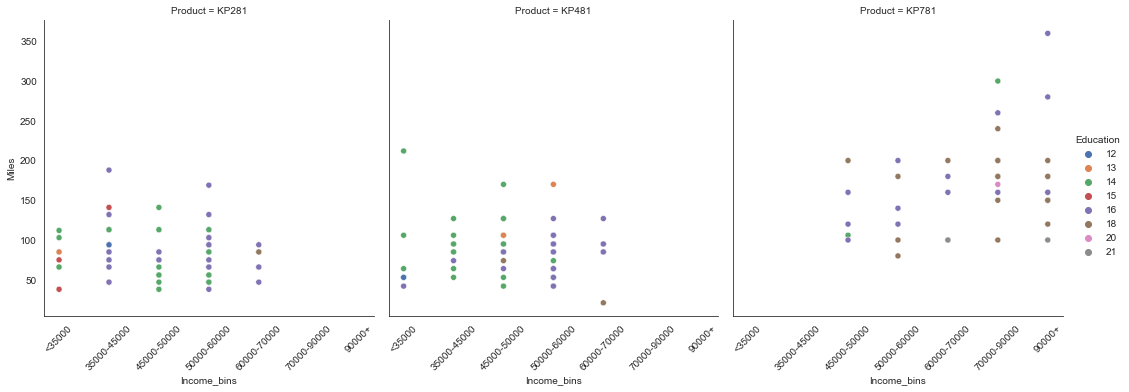

<Figure size 720x432 with 0 Axes>

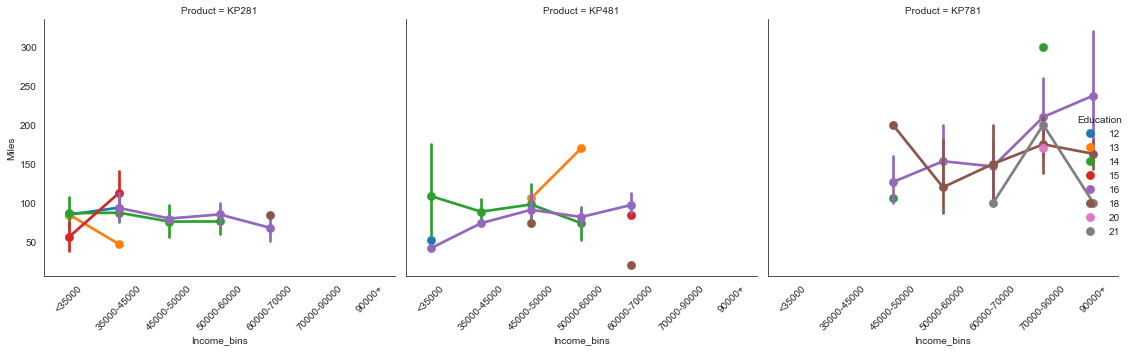

In [139]:
plot=sns.relplot(data=df, x='Income_bins', y='Miles', col='Product', hue='Education', palette="deep", kind="scatter")
plt.figure(figsize=(10,6))
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plot=sns.factorplot(x ='Income_bins', y ='Miles',
               hue='Education',col = 'Product', data = df)
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

Customers with Education level of 13 and in Income range of 45k-60k will tend to use KP481 while those with Education level of 15 and below 35k income will tend to use KP281.

C:\Users\NANO\AppData\Local\Temp\ipykernel_11016\191073201.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
C:\Users\NANO\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


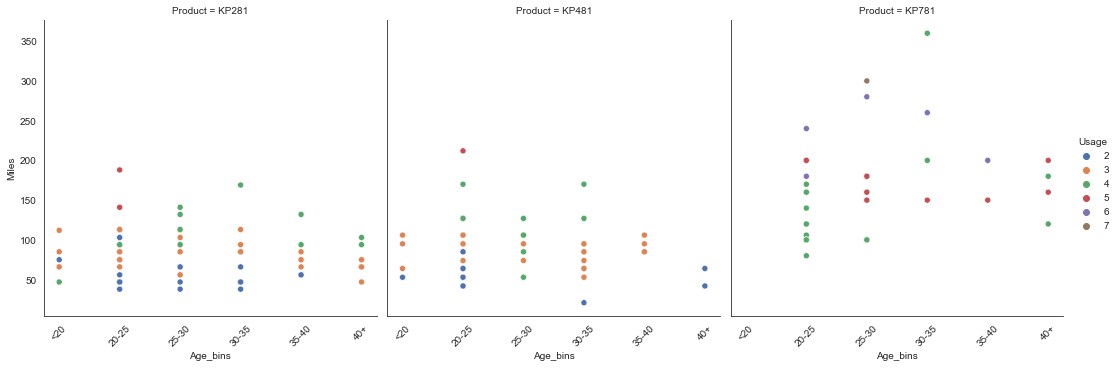

<Figure size 720x432 with 0 Axes>

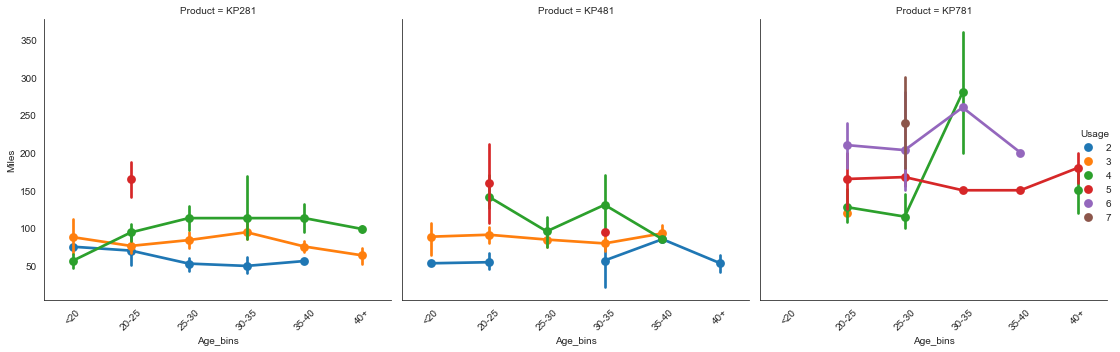

In [140]:
plot=sns.relplot(data=df, x='Age_bins', y='Miles', col='Product', hue='Usage', palette="deep", kind="scatter")
plt.figure(figsize=(10,6))
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plot=sns.factorplot(x ='Age_bins', y ='Miles',
               hue='Usage',col = 'Product', data = df)
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

1) 40+ age users with 2 usages per week are using KP481 and 40+ age users with 3 usages per week who tread below 70 miles use KP281.

2) Users with ages 25-30 and 2 usages per week use KP281.

**Understanding the distribution of the data for the qualitative attributes**:
1. Product
2. Gender
3. MaritalStatus

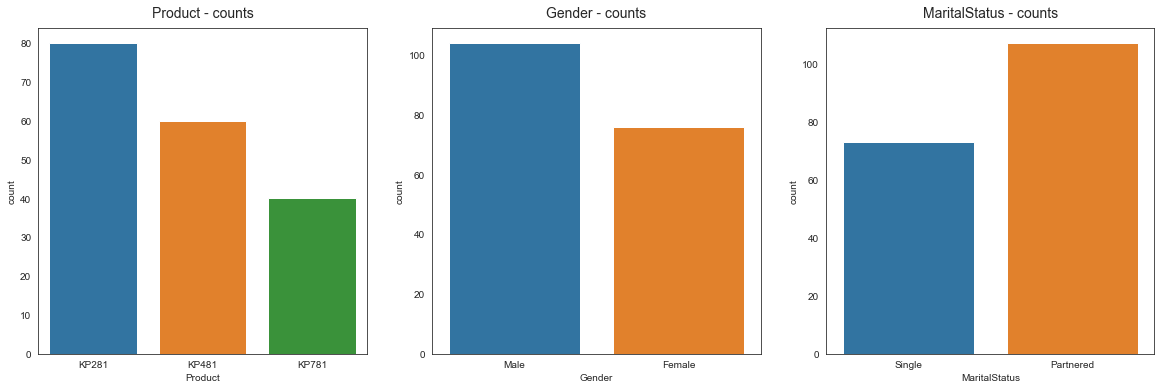

In [93]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.countplot(data=df, x='Product', ax=axs[0])
sns.countplot(data=df, x='Gender', ax=axs[1])
sns.countplot(data=df, x='MaritalStatus', ax=axs[2])

axs[0].set_title("Product - counts", pad=10, fontsize=14)
axs[1].set_title("Gender - counts", pad=10, fontsize=14)
axs[2].set_title("MaritalStatus - counts", pad=10, fontsize=14)
plt.show()

* KP281 is the most frequent product.
* Thare are more Males in the data than Females.
* More Partnered persons are there in the data.

In [94]:
# to be precise - normalized count for each variable is shown below
df1 = df[['Product', 'Gender', 'MaritalStatus']].melt()
df1.groupby(['variable', 'value'])[['value']].count() / len(df)

value
variable      value              
Gender        Female     0.422222
              Male       0.577778
MaritalStatus Partnered  0.594444
              Single     0.405556
Product       KP281      0.444444
              KP481      0.333333
              KP781      0.222222

### Obervations
**Product**
 * 44.44% of the customers have purchased KP2821 product.
 * 33.33% of the customers have purchased KP481 product.
 * 22.22% of the customers have purchased KP781 product.
 <br>
 
**Gender**

 * 57.78% of the customers are Male.
 * MaritalStatus
 * 59.44% of the customers are Partnered.

### Correlation Between Features

In [95]:
df_copy=df.copy()
df_copy['Gender'].replace(['Male','Female'],[1,0],inplace=True)
df_copy['MaritalStatus'].replace(['Partnered','Single'],[1,0],inplace=True)
df_copy['Product'].replace(['KP281','KP481','KP781'],[0,1,2],inplace=True)
df_copy.corr()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Product,1.000000,0.032225,0.230653,0.495018,-0.017602,0.537447,0.594883,0.624168,0.571596
Age,0.032225,1.000000,0.027544,0.280496,0.192152,0.015064,0.061105,0.513414,0.036618
Gender,0.230653,0.027544,1.000000,0.094089,-0.018836,0.214424,0.254609,0.202053,0.217869
Education,0.495018,0.280496,0.094089,1.000000,0.068569,0.395155,0.410581,0.625827,0.307284
MaritalStatus,-0.017602,0.192152,-0.018836,0.068569,1.000000,-0.007786,-0.050751,0.150293,0.025639
Usage,0.537447,0.015064,0.214424,0.395155,-0.007786,1.000000,0.668606,0.519537,0.759130
Fitness,0.594883,0.061105,0.254609,0.410581,-0.050751,0.668606,1.000000,0.535005,0.785702
Income,0.624168,0.513414,0.202053,0.625827,0.150293,0.519537,0.535005,1.000000,0.543473
Miles,0.571596,0.036618,0.217869,0.307284,0.025639,0.759130,0.785702,0.543473,1.000000


<AxesSubplot:>

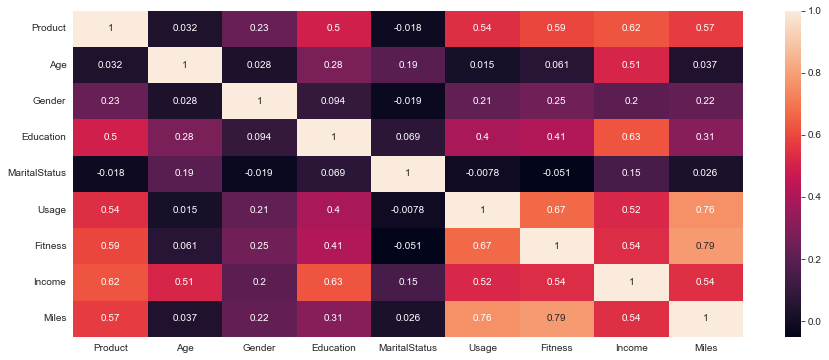

In [96]:
plt.figure(figsize=(15,6))
sns.heatmap(df_copy.corr(),annot=True)

In [97]:
# Features with higher correlation : >0.6

df_copy.corr().unstack()[(df_copy.corr().unstack()>0.65) & (df_copy.corr().unstack()!=1)]

Usage    Fitness    0.668606
         Miles      0.759130
Fitness  Usage      0.668606
         Miles      0.785702
Miles    Usage      0.759130
         Fitness    0.785702
dtype: float64



-  The product/treadmill purchased highly correlates with Education, Income, Usage, Fitness and Miles 

- Age is highly correlated to Income (0.51) which definitely seems reasonable. It's also correlated with Education and Marital Status which stands completely alright.

- Gender certainly has some correlation to Usage, Fitness, Income and Miles. 

- Education is correlated to Age and Miles. It's highly correlated to Income (as expected). It's sufficiently correlated to Usage and Fitness too.

- Marital Status has some correlation to Income and Age (as expected).

- Usage is extremely correlated to Fitness and Miles and has a higher correlation with Income as well.

- Fitness has a great correlation with Income.

**More Observations and Possibilities:-**

1) Product, Fitness, Usage and Miles depict a ridiculously higher correlation among themselves which looks as expected since more the usage implying more miles run and certainly more fitness.

2) Also a story which seems reasonable is that Age and Education (predominately) are indicators of Income which affects the products bought. The more advanced the product is, the more its usage and hence more the miles run which in turns improves the fitness. 



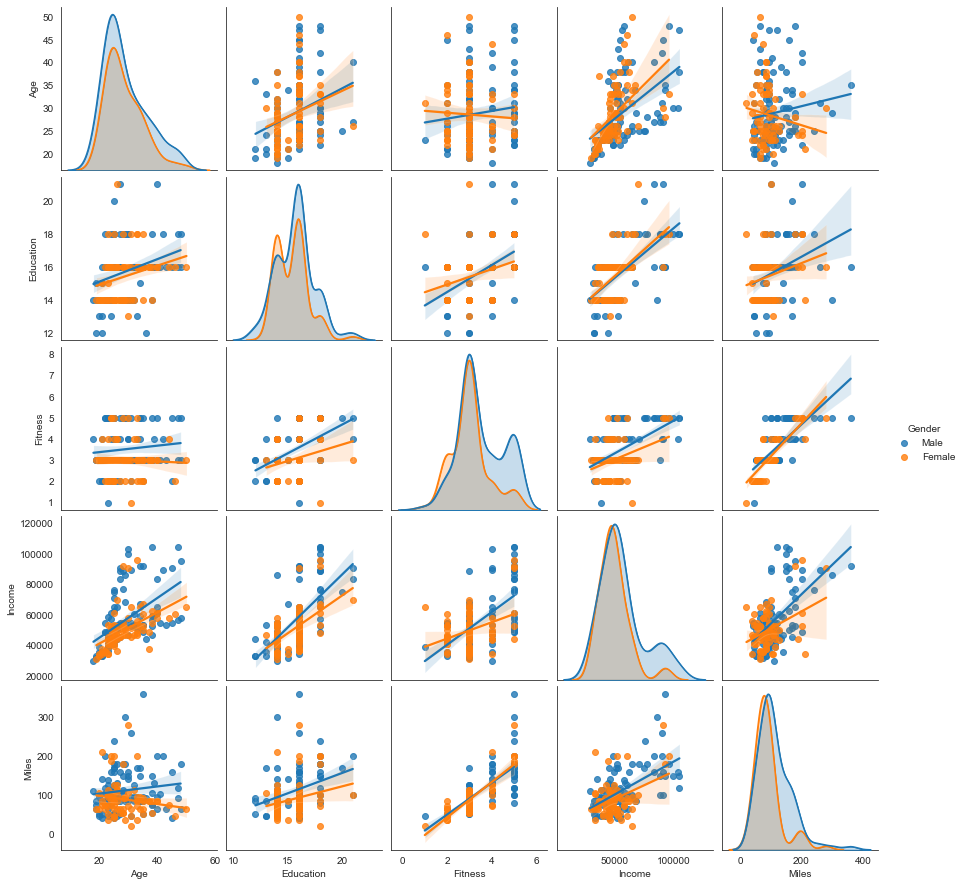

In [98]:
d = df[["Age","Education","Fitness","Income","Miles","Gender"]]
x = sns.pairplot(d,
                kind = "reg",
                hue="Gender")
x.map_diag(sns.kdeplot)
plt.show()

### Two-Way Contingency Table  - 

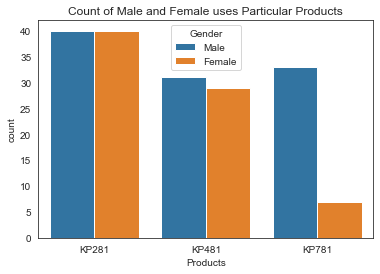

In [99]:
#Across Gender
sns.countplot(data= df ,x = "Product", hue = "Gender")
plt.xlabel("Products")
plt.title("Count of Male and Female uses Particular Products")
plt.show()

In [100]:
pd.crosstab([df["Product"]],df["Gender"],margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [101]:
((pd.crosstab(df["Product"],df["Gender"],margins=True))/180)*100

Gender,Female,Male,All
Product,,,
KP281,22.222222,22.222222,44.444444
KP481,16.111111,17.222222,33.333333
KP781,3.888889,18.333333,22.222222
All,42.222222,57.777778,100.000000


**Marginal Probability** :
(from above tables)

* Probability of Male Customer Purchasing any product is : 57.77 %

* Probability of Female Customer Purchasing any product is : 42.22 %

**Marginal Probability of any customer bmuying**:
* product KP281 is : 44.44 % (cheapest / entry level product)

* product KP481 is : 33.33 % ( for intermediate users)

* product KP781 is : 22.22 % ( product for extensive use who run/walk more miles)

In [102]:
#Across Marital Status
df["MaritalStatus"].value_counts(normalize=True)*100

Partnered    59.444444
Single       40.555556
Name: MaritalStatus, dtype: float64

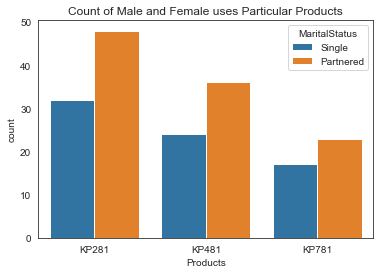

In [103]:
sns.countplot(x = "Product", data= df, hue = "MaritalStatus")
plt.xlabel("Products")
plt.title("Count of Male and Female uses Particular Products")
plt.show()

In [104]:
pd.crosstab([df["Product"]],df["MaritalStatus"],margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [105]:
(pd.crosstab([df["Product"]],df["MaritalStatus"],margins=True)/180)*100

MaritalStatus,Partnered,Single,All
Product,,,
KP281,26.666667,17.777778,44.444444
KP481,20.000000,13.333333,33.333333
KP781,12.777778,9.444444,22.222222
All,59.444444,40.555556,100.000000


**Marginal Probability** for

* Married Customers : 59.44 %
* Single Customers : 40.555 %

### Overall Picture over Few categorical and Numerical features :

<AxesSubplot:xlabel='Miles', ylabel='Income'>

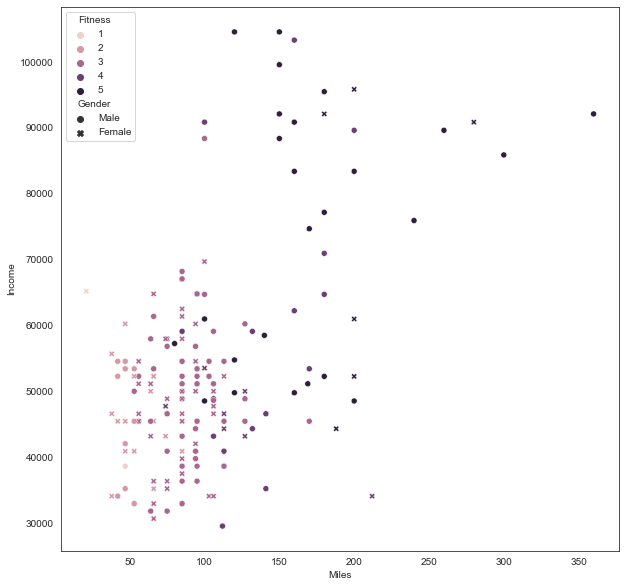

In [106]:
plt.figure(figsize=(10,10))

sns.scatterplot(x = "Miles",y="Income",data = df, hue= "Fitness",style="Gender")

* Above scattered Plot shows the overall picture over customer's income, how much they exercise (run/walk miles) given their gender and their fitness level.
* Most of the customer's fitness level is around 3 to 4 . and it says people who run more miles are having good fitness level.
* Though there is a trend with income and miles. But there are very few customers who earn a lot and run more miles.

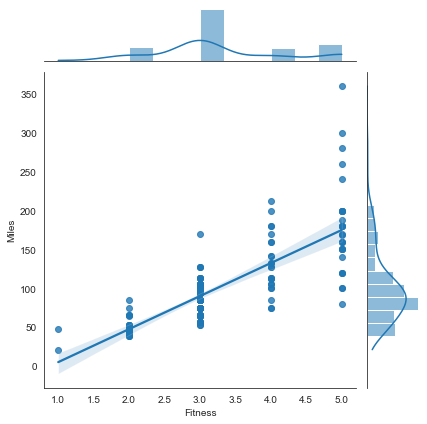

In [107]:
# Relation of Miles and FitnessLevel
sns.jointplot(x = df["Fitness"],
              y= df["Miles"],
             height=6, kind="reg")

In [108]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


## Bivariate Analysis

Checking if features - Gender or MaritalStatus have any effect on the product purchased.

In [ ]:
sns.set_style(style='whitegrid')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6.5))
sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.15", palette='Set2', ax=axs[0])
sns.countplot(data=df, x='Product', hue='MaritalStatus', edgecolor="0.15", palette='Set3', ax=axs[1])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
plt.show()

**Obervations**

 **Product vs Gender**
  
   Equal number of males and females have purchased KP281 product and Almost same for the product KP481

   Most of the Male customers have purchased the KP781 product.
    
 **Product vs MaritalStatus**

   Customer who is Partnered, is more likely to purchase the product.

Checking if following features have any effect on the product purchased:
1. Age
2. Education
3. Usage
4. Fitness
5. Income
6. Miles

In [ ]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='Product', y=attrs[count], ax=axs[i,j], palette='Set3')
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
        count += 1

### Observations
**Product vs Age**
 * Customers purchasing products KP281 & KP481 are having same Age median value.
 * Customers whose age lies between 25-30, are more likely to buy KP781 product

**Product vs Education**
 * Customers whose Education is greater than 16, have more chances to purchase the KP781 product.
 * While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.

**Product vs Usage**

 * Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.
 * While the other customers are likely to purchasing KP281 or KP481.
 
**Product vs Fitness**
 * The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the KP781 product.
 
**Product vs Income**
 * Higher the Income of the customer (Income >= 60000), higher the chances of the customer to purchase the KP781 product.
 
**Product vs Miles**
 * If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy KP781 product.


## Multivariate Analysis

In [ ]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
fig.subplots_adjust(top=1.3)
count = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=df, x='Gender', y=attrs[count], hue='Product', ax=axs[i,j], palette='Set3')
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
        count += 1

Females planning to use treadmill 3-4 times a week, are more likely to buy KP481 product

### Computing Marginal & Conditional Probabilities

In [ ]:
df['Product'].value_counts(normalize=True)

**Conditional Probabilities**

In [110]:
# Probability of each product given gender
def p_prod_given_gender(gender, print_marginal=False):
    if gender is not "Female" and gender is not "Male":
        return "Invalid gender value."
    
    df1 = pd.crosstab(index=df['Gender'], columns=[df['Product']])
    p_781 = df1['KP781'][gender] / df1.loc[gender].sum()
    p_481 = df1['KP481'][gender] / df1.loc[gender].sum()
    p_281 = df1['KP281'][gender] / df1.loc[gender].sum()
    
    if print_marginal:
        print(f"P(Male): {df1.loc['Male'].sum()/len(df):.2f}")
        print(f"P(Female): {df1.loc['Female'].sum()/len(df):.2f}\n")
    
    print(f"P(KP781/{gender}): {p_781:.2f}")
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP281/{gender}): {p_281:.2f}\n")
    
p_prod_given_gender('Male', True)
p_prod_given_gender('Female')

P(Male): 0.58
P(Female): 0.42

P(KP781/Male): 0.32
P(KP481/Male): 0.30
P(KP281/Male): 0.38

P(KP781/Female): 0.09
P(KP481/Female): 0.38
P(KP281/Female): 0.53



<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\NANO\AppData\Local\Temp\ipykernel_11016\3245079509.py:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if gender is not "Female" and gender is not "Male":
C:\Users\NANO\AppData\Local\Temp\ipykernel_11016\3245079509.py:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if gender is not "Female" and gender is not "Male":


In [111]:
# Probability of each product given MaritalStatus
def p_prod_given_mstatus(status, print_marginal=False):
    if status is not "Single" and status is not "Partnered":
        return "Invalid marital status value."
    
    df1 = pd.crosstab(index=df['MaritalStatus'], columns=[df['Product']])
    p_781 = df1['KP781'][status] / df1.loc[status].sum()
    p_481 = df1['KP481'][status] / df1.loc[status].sum()
    p_281 = df1['KP281'][status] / df1.loc[status].sum()
    
    if print_marginal:
        print(f"P(Single): {df1.loc['Single'].sum()/len(df):.2f}")
        print(f"P(Partnered): {df1.loc['Partnered'].sum()/len(df):.2f}\n")
    
    print(f"P(KP781/{status}): {p_781:.2f}")
    print(f"P(KP481/{status}): {p_481:.2f}")
    print(f"P(KP281/{status}): {p_281:.2f}\n")
    
p_prod_given_mstatus('Single', True)
p_prod_given_mstatus('Partnered')

P(Single): 0.41
P(Partnered): 0.59

P(KP781/Single): 0.23
P(KP481/Single): 0.33
P(KP281/Single): 0.44

P(KP781/Partnered): 0.21
P(KP481/Partnered): 0.34
P(KP281/Partnered): 0.45



<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\NANO\AppData\Local\Temp\ipykernel_11016\4167693091.py:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if status is not "Single" and status is not "Partnered":
C:\Users\NANO\AppData\Local\Temp\ipykernel_11016\4167693091.py:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if status is not "Single" and status is not "Partnered":


### Customer Profiling - Categorization of users.

**KP281**:
    
* Most affordable and entry level and Maximum Selling Product.
* This model popular amongst both Male and Female customers
* Same number of Male and Female customers.
* Customers walk/run average 70 to 90 miles on this product.
* Customers use 3 to 4 times a week
* Fitness Level of this product users is Average Shape.
* More general purpose for all age group and fitness levels.

**KP481**:
    
* Intermediate Price Range
* Fitness Level of this product users varies from Bad to Average Shape depending on their usage.
* Customers prefer KP481 model to use less frequent but to run more miles per week on this.
* Customer walk/run average 70 to 130 or more miles per week on his product.
* has higher probability of selling for female customers.
* Probability of Female customer buying KP481 is significantly higher than male.
* KP481 product is specifically recommended for Female customers who are intermediate user.
* customers are from adult, teen and mid-age categories.

**KP781**:
    
* least sold product.
* high price and preferred by customers who does exercises more extensively and run more miles.
* Customer walk/run average 120 to 200 or more miles per week on his product.
* Customers use 4 to 5 times a week at least.
* If person is in Excellent Shape , the probability that he is using KP781 is more than 90%.
* Female Customers who are running average 180 miles (extensive exercise) , are using product KP781, which is higher than Male average using same product.
* KP781 can be recommended for Female customers who exercises extensively.
* Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).
* Probability of a single person buying KP781 is higher than Married customers. So , KP781 is also recommended for people who are single and exercises more.
* most of old people who are above 45 age and adult uses this product.

## Recommendations :

* Recommend KP781 product to users who exercises/run more frequently and run more and more miles , and have high income. Since Kp781 is least selling product (22.2% share of all the products) , recommend this product some customers who exercise at intermediate to extensive level , if they are planning to go for KP481. Also the targeted Age Category is Adult and age above 45.

* Recommend KP481 product specifically for female customers who run/walk more miles , as data shows their probability is higher. Statistical Summery about fitness level and miles for KP481 is not good as KP281 which is cheaper product. Possibly because of price, customers prefer to purchase KP281. It is recommended to make some necessary changes to product K481 to increase customer experience.